# Streaming Soil Grids Building Blocks

**Author:** [Taimur Khan](https://www.ufz.de/index.php?en=49404)

**Date:** 2025-02-20

Install the package (unless already installed):

In [ ]:
!pip install git+https://github.com/BioDT/general-soilgrids-soil-data.git

  Cloning https://github.com/BioDT/general-soilgrids-soil-data.git to /private/var/folders/pd/scby1cjx6tx_33rnmv0q6r8m0000gr/T/pip-req-build-krejynzn
  Running command git clone --filter=blob:none --quiet https://github.com/BioDT/general-soilgrids-soil-data.git /private/var/folders/pd/scby1cjx6tx_33rnmv0q6r8m0000gr/T/pip-req-build-krejynzn
  Resolved https://github.com/BioDT/general-soilgrids-soil-data.git to commit 685e64686c8da6d6ca7d92779275461c9f64d14c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Check import:



In [1]:
from soilgrids import data_processing as dprc

Get data for the Global Change Experiment Facility (GCEF) in Bad Lauchstädt, Germany.

Call "data_processing(coordinates, *, file_name=file_name, hhs_cache=hhs_cache)" to download data for a given location and produce .txt files in grassland model input data format.

Parameters:

coordinates (dict): Dictionary with 'lat' and 'lon' keys ({'lat': float, 'lon': float}).
file_name (str or Path): File name to save soil data (optional, default file name is used if not provided).
hhs_cache (Path): Path for local HiHydroSoil map directory (optional).

In [ ]:
coordinates_list = {"lat": 51.390427, "lon": 11.876855}  # GER, GCEF grassland site
dprc.data_processing(coordinates_list) # optionall provide the path to save the data in argument ""

2025-02-26 15:14:13,235 - INFO - Preparing soil data for latitude: 51.390427, longitude: 11.876855 ...
2025-02-26 15:14:13,237 - INFO - SoilGrids REST API download from https://rest.isric.org/soilgrids/v2.0/properties/query ... 
2025-02-26 15:14:15,030 - INFO - Reading SoilGrids data ...
2025-02-26 15:14:15,036 - INFO - Depth 0-5cm, silt mean: 57.8 %
2025-02-26 15:14:15,036 - INFO - Depth 5-15cm, silt mean: 58.0 %
2025-02-26 15:14:15,037 - INFO - Depth 15-30cm, silt mean: 60.3 %
2025-02-26 15:14:15,037 - INFO - Depth 30-60cm, silt mean: 57.7 %
2025-02-26 15:14:15,038 - INFO - Depth 60-100cm, silt mean: 56.6 %
2025-02-26 15:14:15,038 - INFO - Depth 100-200cm, silt mean: 57.0 %
2025-02-26 15:14:15,039 - INFO - Depth 0-5cm, clay mean: 23.4 %
2025-02-26 15:14:15,040 - INFO - Depth 5-15cm, clay mean: 23.6 %
2025-02-26 15:14:15,040 - INFO - Depth 15-30cm, clay mean: 23.8 %
2025-02-26 15:14:15,041 - INFO - Depth 30-60cm, clay mean: 26.9 %
2025-02-26 15:14:15,041 - INFO - Depth 60-100cm, clay 

There might be some error as you see it above, but ignore it for the purpose of this demonstration, the data is generated nonetheless.

Visualize the data:

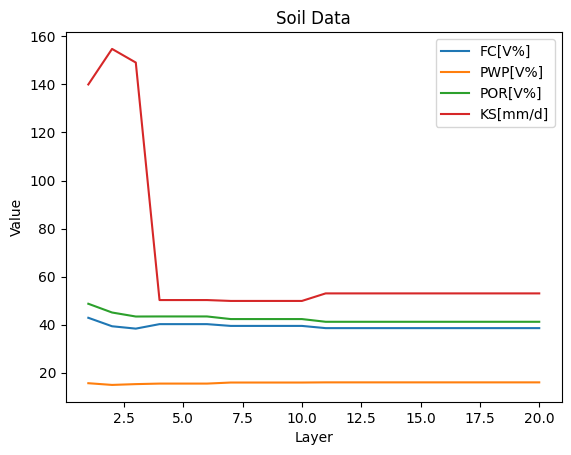

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the text file
file_path = '/Users/khant/Documents/GitHub/Hackathon25/03-BuildingBlocks/SoilData/soilDataPrepared/lat51.390427_lon11.876855__2020__soil.txt'
data = pd.read_csv(file_path, sep='\t', skiprows=2)

# Plot each column
columns = data.columns[1:]  # Skip the 'Layer' column
for column in columns:
    plt.plot(data['Layer'], data[column], label=column)

# Add labels and legend
plt.xlabel('Layer')
plt.ylabel('Value')
plt.legend()
plt.title('Soil Data for GCEF')
plt.show()
